# Tutorial 3 : First level of explicabity: statistics

In this class we will use data from the same dataset we used in the previous TD. We will build upon the work done previously.
* We will be using python for the data analysis (R is accepted as well if needed)
* The main libraries we are going to use are pandas,SHAP, matplotlib and sklearn
* This TD will not be graded.


Question 1.
Create a new notebook and from TD2 load the variable selection and the different models that you
created



In [1]:
#%pip install -U ucimlrepo

In [2]:
from ucimlrepo import fetch_ucirepo 
import pandas as pd

# fetch dataset 
heart_disease = fetch_ucirepo(id=45) 
  
# data (as pandas dataframes) 
X = heart_disease.data.features 
y = heart_disease.data.targets 

data =pd.concat([X.reset_index(drop=True), y], axis=1)

In [3]:
# variable information 
pd.DataFrame(heart_disease.variables)

,name,role,type,demographic,description,units,missing_values
0,age,Feature,Integer,Age,None,years,no
1,sex,Feature,Categorical,Sex,None,None,no
2,cp,Feature,Categorical,None,None,None,no
3,trestbps,Feature,Integer,None,resting blood pressure (on admission to the ho...,mm Hg,no
4,chol,Feature,Integer,None,serum cholestoral,mg/dl,no
5,fbs,Feature,Categorical,None,fasting blood sugar > 120 mg/dl,None,no
6,restecg,Feature,Categorical,None,None,None,no
7,thalach,Feature,Integer,None,maximum heart rate achieved,None,no
8,exang,Feature,Categorical,None,exercise induced angina,None,no
9,oldpeak,Feature,Integer,None,ST depression induced by exercise relative to ...,None,no


In [4]:
data.dropna(inplace=True)
target = (data['num'] > 1).astype(int)
del(data['num'])
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0


In [5]:
# Convert from categorical to numeric data
from sklearn.preprocessing import OneHotEncoder # type: ignore


categorical_variables = heart_disease.variables[heart_disease.variables["type"] == "Categorical"].name
# Separate categorical and non-categorical data
categorical_data = data[categorical_variables]
non_categorical_data = data.drop(columns=categorical_variables)

enc = OneHotEncoder(sparse_output=False).fit(data)
encoded_data = enc.fit_transform(categorical_data)
# Convert encoded data to a DataFrame with appropriate column names
encoded_categorical_df = pd.DataFrame(encoded_data, columns=enc.get_feature_names_out(categorical_variables))

# Concatenate the encoded categorical data with the non-categorical data
data = pd.concat([non_categorical_data.reset_index(drop=True), encoded_categorical_df.reset_index(drop=True)], axis=1)

# Display the first few rows
data.head()

,age,trestbps,chol,thalach,oldpeak,ca,sex_0,sex_1,cp_1,cp_2,...,restecg_1,restecg_2,exang_0,exang_1,slope_1,slope_2,slope_3,thal_3.0,thal_6.0,thal_7.0
0,63,145,233,150,2.3,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,67,160,286,108,1.5,3.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
2,67,120,229,129,2.6,2.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
3,37,130,250,187,3.5,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4,41,130,204,172,1.4,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [6]:
from sklearn.metrics import accuracy_score, classification_report, f1_score,recall_score,confusion_matrix # type: ignore
from sklearn.model_selection import train_test_split # type: ignore

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.30)


In [7]:
from sklearn.linear_model import LogisticRegression # type: ignore

lrg_clf = LogisticRegression(max_iter=1000)
lrg_clf.fit(X_train, y_train)
y_prob = lrg_clf.predict(X_test)

print(classification_report(y_test, y_prob))
dt_acc=accuracy_score(y_prob,y_test)
dt_F1=f1_score(y_prob,y_test)
dt_rec=recall_score(y_prob,y_test)

              precision    recall  f1-score   support

           0       0.88      0.94      0.91        68
           1       0.76      0.59      0.67        22

    accuracy                           0.86        90
   macro avg       0.82      0.77      0.79        90
weighted avg       0.85      0.86      0.85        90



/usr/local/python/3.12.1/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [8]:
from sklearn.tree import DecisionTreeClassifier # type: ignore

dt_clf = DecisionTreeClassifier(max_depth = 6, min_samples_split = 20, random_state = 42)

dt_clf.fit(X_test, y_test)

dt_y_pred = dt_clf.predict(X_test)

print(classification_report(y_test, dt_y_pred))
dt_acc=accuracy_score(dt_y_pred,y_test)
dt_F1=f1_score(dt_y_pred,y_test)
dt_rec=recall_score(dt_y_pred,y_test)

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        68
           1       0.91      0.91      0.91        22

    accuracy                           0.96        90
   macro avg       0.94      0.94      0.94        90
weighted avg       0.96      0.96      0.96        90



In [9]:
from sklearn.ensemble import RandomForestClassifier # type: ignore

rf_clf = RandomForestClassifier(bootstrap= True, max_features= 10, min_samples_leaf= 4, min_samples_split= 10, n_estimators= 100, random_state=42)

# Fit the mode
rf_clf.fit(X_train, y_train)

# Test the performance with the tuned hyperparameters
rf_y_pred = rf_clf.predict(X_test)

print(classification_report(y_test, rf_y_pred))
rf_acc = accuracy_score(rf_y_pred,y_test)
rf_F1 = f1_score(rf_y_pred,y_test)
rf_rec=recall_score(rf_y_pred,y_test)

              precision    recall  f1-score   support

           0       0.89      0.93      0.91        68
           1       0.74      0.64      0.68        22

    accuracy                           0.86        90
   macro avg       0.81      0.78      0.79        90
weighted avg       0.85      0.86      0.85        90






Question 2.
Install the shap package (documentation here https://shap.readthedocs.io/en/latest/index.html)



In [10]:
#%pip install shap
import shap

/usr/local/python/3.12.1/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm



Question 3.
Let’s begin with an enrichment on the random forest interpretation.
* Get the variable importance of your features
* Recall the explanation you gave on them
* using the Treeexplainer function of the shap package, find the shapley values
* Visualise a couple of the explanations that are given with shap.forceplot. Can you explain them?
* Using the ”summary plot” with the ”plot type” equal to bar feature can you compare the importance
that shapley gives to the importance that the native ”variable importance” has given you?
* Do you understand the plot if you remove the plot type?


In [11]:
rf_clf.feature_importances_

array([0.03640123, 0.04796623, 0.06672231, 0.09543604, 0.13288573,
       0.24055292, 0.00349857, 0.00224173, 0.00172537, 0.        ,
       0.00188393, 0.09475238, 0.00780869, 0.00635652, 0.01167438,
       0.        , 0.00652602, 0.03784247, 0.03954317, 0.02906546,
       0.02002287, 0.0025997 , 0.09110666, 0.00245979, 0.02092781])

In [ ]:
import matplotlib.pyplot as plt
tree_explainer = shap.TreeExplainer(rf_clf)
shap_values = tree_explainer.shap_values(X_train)

NotImplementedError: matplotlib = True is not yet supported for force plots with multiple samples!

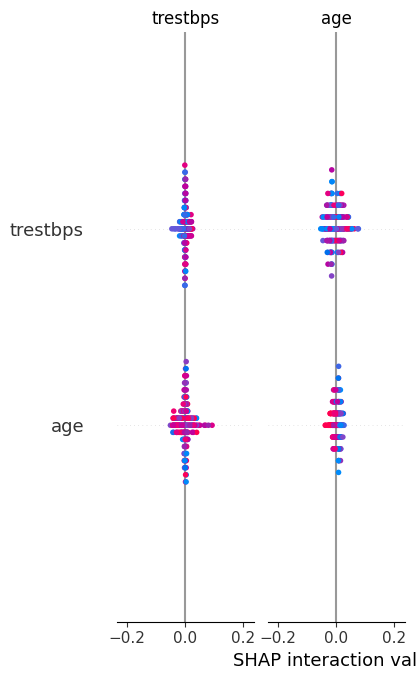

In [28]:
# Plot variable importance
shap.summary_plot(shap_values, X_train)

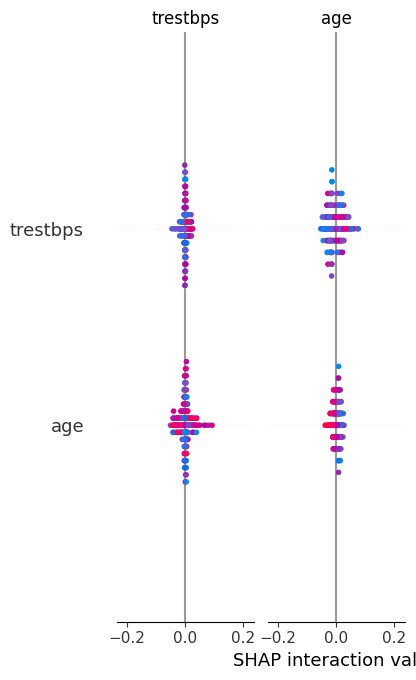

In [25]:
# Create a summary plot with bar plot type
shap.summary_plot(shap_values, X_train, plot_type="bar", feature_names=X_train.columns)

# Show the plot
plt.show()


Question 4.
Now lets work on a different model. Let’s train an Xgboost
How does Xgboost work ? what is boosting? you can search the internet for these answers
* Install the Xgboost library if it’s not already installed
* Fit an Xgboost to your data and fine tune it
* Is it better than your Random Forest? why?


In [ ]:
# %pip install xgboost
import xgboost

In [ ]:
from sklearn.ensemble import RandomForestClassifier # type: ignore

rf_clf = RandomForestClassifier(bootstrap= True, max_features= 10, min_samples_leaf= 4, min_samples_split= 10, n_estimators= 100, random_state=42)

# Fit the mode
rf_clf.fit(X_train, y_train)

# Test the performance with the tuned hyperparameters
rf_y_pred = rf_clf.predict(X_test)

print(classification_report(y_test, rf_y_pred))
rf_acc = accuracy_score(rf_y_pred,y_test)
rf_F1 = f1_score(rf_y_pred,y_test)
rf_rec=recall_score(rf_y_pred,y_test)


Question 5.
Let’s compare the feature importance of the Random Forest and the Xgboost
* Using shap’s tree explainer get the shapley values for this new model.
* Select the variables that are the most important and plot a dependency plot. Does the result confirm
your intuition?
* Compare the summary plot to the summary plot of the random forest. What are the changes?



Question 6.
We can use shapley values from the Xgboost to learn more about the properties. Let’s cluster the
properties based on the shapley values.
* Let’s reduce the dimension of our data for visualisation purposes. Do a PCA with the shapley values
and visualise the 2 principal axis.
* Given the visualisation choose a clustering algorithm (K-Means, DBSCAN, gausian mixture...) and try to cluster the shapley values of the property.
* Visualise your results
* What characteristics can you give to each cluster?
* What conclusion can you reach?